Elabore um documento descrevendo sua análise exploratória usando elementos visuais adequados. O documento deve conter:

* Descrição das fontes de dados
* Descrição das principais variáveis (features)
* Análises inciais de distribuição e/ou correlação com gráficos adequados
* Conclusões/ideias/hipóteses iniciais

Vamos escrevendo essas coisas em comentários no decorrer do código.
No .py aparece só como comentários, mas quando a gente for passar pro Jupyter dá pra colocar em células de markdown, e gerar o PDF pra entregar

==============================================

# Relatório - Análise Exploratória

Gabriel Eugenio Brito, Renan de Souza Antunes, Aurélio Vinicius Cabral Funes

## Descrição das fontes de dados

Os dados utilizados são provenientes da Polícia Rodoviária Federal, e estão disponíveis em https://www.prf.gov.br/portal/dados-abertos/acidentes. Eles consistem em uma série de arquivos csv com informações referentes a acidentes ocorridos do ano de 2007 em diante. Optamos por usar apenas os dados de 2018, mas se for  necessário podemos utilizar dados de outros anos para fazer um comparativo.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('acidentes2018.csv', sep=';', encoding='latin-1')

A princípio pensamos que cada linha do csv tivesse informações relativas a um acidente, mas após olhar com mais cuidado percebemos que existem várias linhas com o mesmo id. Na verdade cada linha representa um envolvido em um acidente.

In [3]:
# Raw data
pd.set_option('display.max_columns', None) # None = mostra todas

print(df.columns)
df.head()

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973.0,216524.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,59.0,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
1,99973.0,216530.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,15.0,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
2,99973.0,216523.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Condutor,Lesões Graves,58.0,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
3,99973.0,216527.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,9.0,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
4,99973.0,216532.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Ileso,9.0,Masculino,1,0,0,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ


In [4]:
# Descarta informações específicas dos envolvidos, porque a principio não vamos usar

grouped_by_accident = df.groupby('id')

# Se o acidente é o mesmo, essas informações vão ser iguais pra todas as linhas daquele acidente
accident_data = grouped_by_accident[
    'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
    'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
    'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
    'uso_solo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
    'latitude', 'longitude', 'regional', 'delegacia', 'uop'
].first()

# Calcula a quantidade de feridos, mortos, etc no acidente
accident_data['n_ilesos'] = grouped_by_accident['ilesos'].sum()
accident_data['n_feridos_leves'] = grouped_by_accident['feridos_leves'].sum()
accident_data['n_feridos_graves'] = grouped_by_accident['feridos_graves'].sum()
accident_data['n_mortos'] = grouped_by_accident['mortos'].sum()

accident_data['n_envolvidos'] = accident_data['n_ilesos'] + accident_data['n_feridos_leves'] + accident_data['n_feridos_graves'] + accident_data['n_mortos']

accident_data.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,0,0,1,0,-22.469370,-44.447050,SR-RJ,DEL5/7,UOP03/RJ,1,0,4,0,5
99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,0,0,1,0,-27.599717,-48.575657,SR-SC,DEL8/1,UOP01/SC,1,0,2,0,3
99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Curva,Não,1,0,0,0,-22.763901,-42.927532,SR-RJ,DEL5/4,UOP02/RJ,3,1,0,0,4
99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Interseção de vias,Não,1,0,0,0,-27.953636,-52.916374,SR-RS,DEL9/14,UOP01/RS,2,0,0,0,2
99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,0,0,1,0,-31.395214,-53.783912,SR-RS,DEL9/11,UOP03/RS,0,0,1,0,1


In [5]:
# Algumas estatísticas
accident_data.describe()

,br,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
count,69092.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000
mean,215.258974,0.503352,0.325694,0.088200,0.029651,-18.696301,-46.652405,1.066569,0.850866,0.254891,0.076135,2.248461
std,130.654539,0.499992,0.468637,0.283588,0.169623,7.875188,6.189804,1.482661,1.105815,0.607823,0.324646,1.921826
min,10.000000,0.000000,0.000000,0.000000,0.000000,-33.689819,-70.744728,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,0.000000,0.000000,0.000000,0.000000,-25.273954,-50.218570,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,1.000000,0.000000,0.000000,0.000000,-20.337180,-47.838150,1.000000,1.000000,0.000000,0.000000,2.000000
75%,343.000000,1.000000,1.000000,0.000000,0.000000,-12.509536,-42.643336,1.000000,1.000000,0.000000,0.000000,3.000000
max,498.000000,1.000000,1.000000,1.000000,1.000000,4.428241,-34.827690,56.000000,58.000000,28.000000,13.000000,80.000000


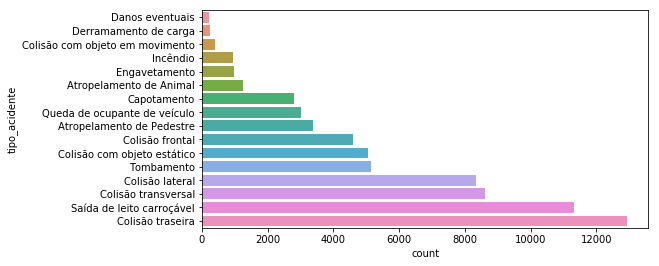

In [6]:
# Número de acidentes por tipo de acidente
plt.figure(figsize=(8,4))
sb.countplot(y="tipo_acidente", data=accident_data, order=accident_data['tipo_acidente'].value_counts(ascending=True).index)

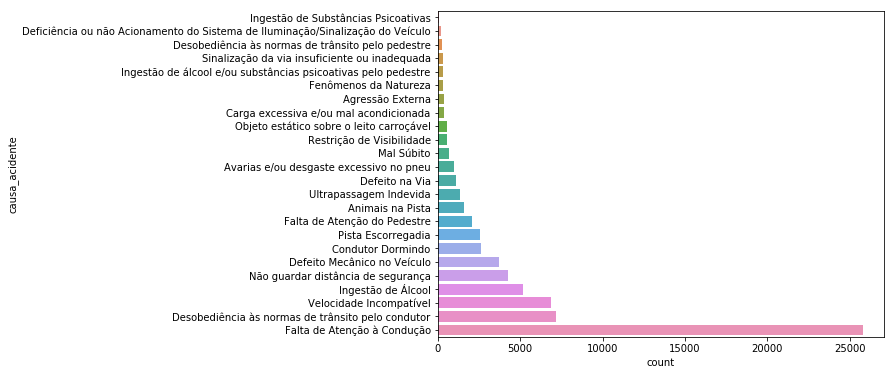

In [7]:
# Número de acidentes por causa
plt.figure(figsize=(8,6))
sb.countplot(y="causa_acidente", data=accident_data, order=accident_data['causa_acidente'].value_counts(ascending=True).index)

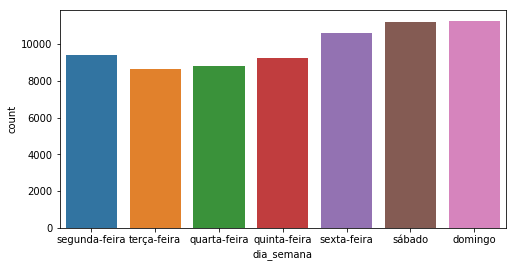

In [8]:
# Número de acidentes por dia da semana
plt.figure(figsize=(8,4))
sb.countplot(x="dia_semana", data=accident_data)

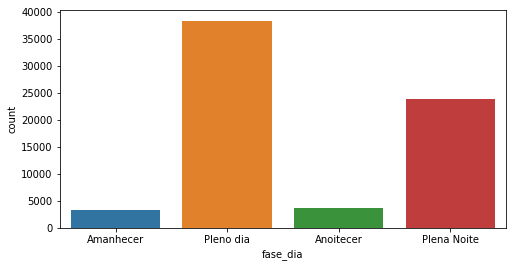

In [9]:
# Número de acidentes por fase do dia
plt.figure(figsize=(8,4))
sb.countplot(x="fase_dia", data=accident_data, order=['Amanhecer', 'Pleno dia', 'Anoitecer', 'Plena Noite'])

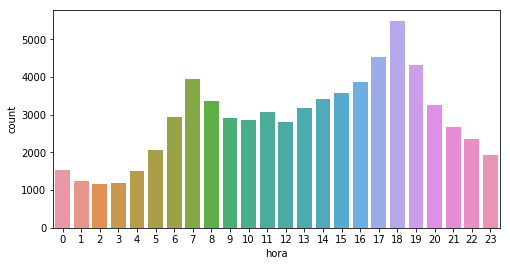

In [10]:
# Número de acidentes por hora
tmp = pd.DataFrame()
tmp['hora'] = pd.to_datetime(accident_data['horario']).dt.hour

plt.figure(figsize=(8, 4))
sb.countplot(x='hora', data=tmp)

/home/eragon/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


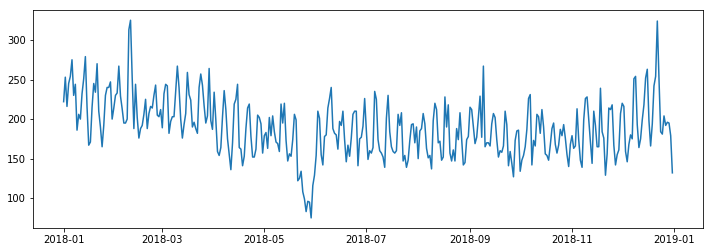

In [11]:
# Número de acidentes no decorrer do ano (série temporal)

# Já é pra estar ordenado no dataset, mas só pra garantir
accident_data['data_inversa'] = pd.to_datetime(accident_data['data_inversa'])
accident_data.sort_values(by='data_inversa')

plt.figure(figsize=(12, 4))
time_series = sb.lineplot(data=accident_data.groupby('data_inversa').size())

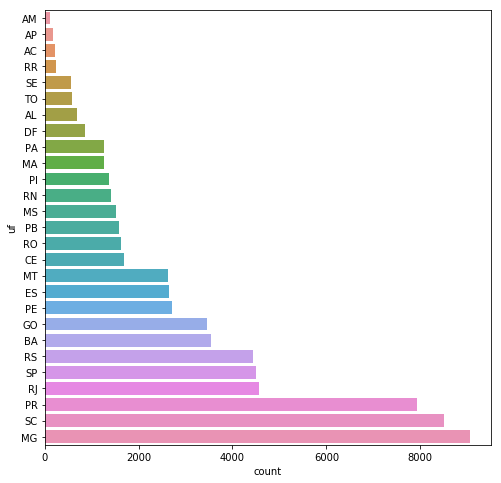

In [12]:
# Acidentes por estado
plt.figure(figsize=(8,8))
sb.countplot(y="uf", data=accident_data, order=accident_data['uf'].value_counts(ascending=True).index)

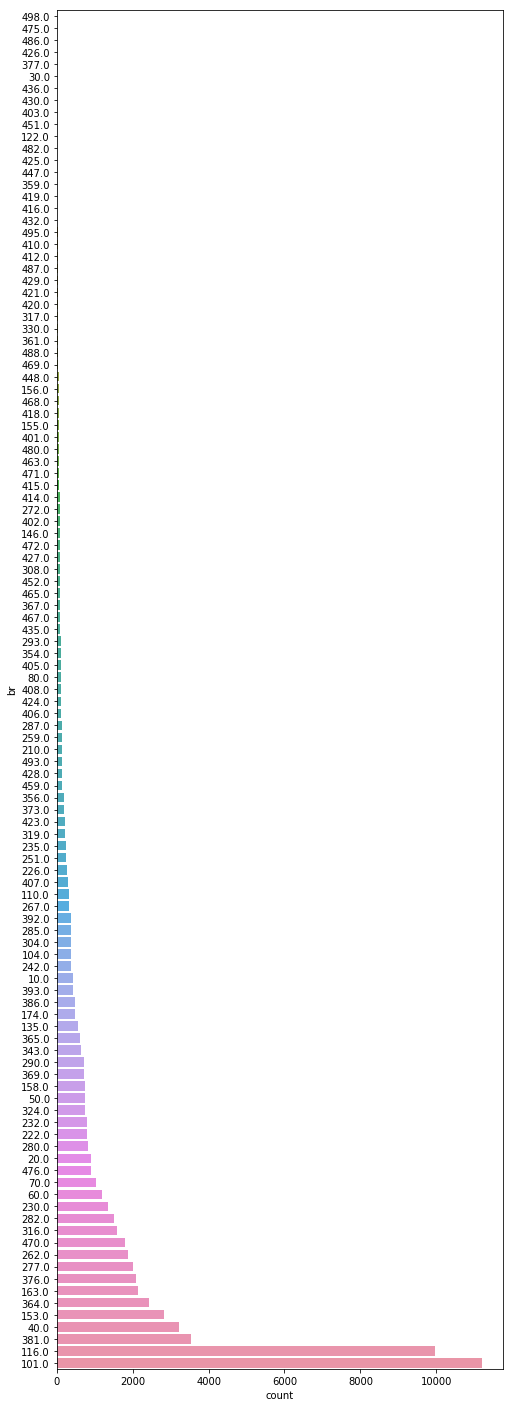

In [13]:
# Acidentes por BR
plt.figure(figsize=(8,25))
sb.countplot(y="br", data=accident_data, order=accident_data['br'].value_counts(ascending=True).index)

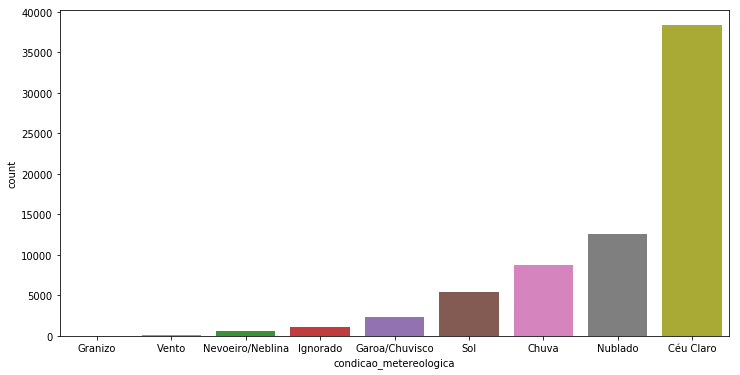

In [14]:
# Acidentes por clima
plt.figure(figsize=(12,6))
sb.countplot(x="condicao_metereologica", data=accident_data, order=accident_data['condicao_metereologica'].value_counts(ascending=True).index)

In [15]:
# As informações dos veículos não dá pra fazer como a gente tava fazendo até agora
# porque alguns acidentes envolvem mais de um veículo. Se pegar só o primeiro,
# nós estamos descartando vários deles.
# Temos que repensar essas estatísticas

# Acidentes por tipo de veiculo
#pd.value_counts(accident_data['tipo_veiculo']).plot('bar')

# mortos por ano do veículo (carros mais novos são mais seguros, será?)

# absoluto
#sns.lineplot(data=accident_data.groupby('ano_fabricacao_veiculo').agg('sum')['n_mortos'])

# média
#sns.lineplot(data=accident_data.groupby('ano_fabricacao_veiculo').agg('mean')['n_mortos'])